# Cluster Analysis




In [1]:
import sys
sys.path.append("..")
from benchmark.results import load_all_results
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, rand_score


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("whitegrid")
palette = sns.color_palette("colorblind")

In [2]:
dataset = 'gist' # 'glove', 'gist', 'pamap2', 'household', 'mnist', 'celeba', 'census, 'aloi'
exact_algorithm = 'srrdbscan' # for high-dimensional datasets, this has to be 'faiss'

data = []
data2 = []

# load all the results that are available for the dataset
for f in load_all_results(dataset, ".."):
    # filter by the exact algorithm
    if f.attrs['algo'] == exact_algorithm and f.attrs['minPts'] == 20:
        labels = np.array(f['labels'])
        points_clustered = len([x for x in np.array(labels) if x >= 0])
        largest_cluster_size = 0
        if len(labels[labels > -1]) > 0:
            largest_cluster_size = max(Counter(labels[labels > -1]).values())/len(labels)
        data.append({
            "eps": f.attrs['eps'],
            "minPts": f.attrs['minPts'],
            "n": len(labels),
            "num_clusters": len(set(labels)),
            "largest_cluster_size": largest_cluster_size, 
            "num_corepoints": len(f['corepoints']),
            "num_noncorepoints": len(labels) - len(f['corepoints']),
            "points_clustered": points_clustered,
            "fraction_clustered": points_clustered/len(labels),
            "fraction_noise": len([x for x in np.array(labels) if x < 0])/len(labels),
            "cluster_sizes": sorted(Counter(labels[labels > -1]).values(),reverse=True),
            "Params": f.attrs['params'],
            #"time": f.attrs['time'],
            })
    if f.attrs['algo'] == 'srrdbscan' and 'delta=0.1' in f.attrs['params'] and f.attrs['minPts'] == 20:
        data2.append({
            "eps": f.attrs['eps'],
            "time": f.attrs['time']
            })

df = pd.DataFrame(data=data)
df2 = pd.DataFrame(data=data2)
df

,eps,minPts,n,num_clusters,largest_cluster_size,num_corepoints,num_noncorepoints,points_clustered,fraction_clustered,fraction_noise,cluster_sizes,Params
0,1.25,20,1000000,34,0.666001,666686,333314,666686,0.666686,0.333314,"[666001, 68, 53, 51, 50, 48, 44, 40, 36, 34, 3...","SRRDBSCAN(delta=0.01, memory=5, threads=56, sh..."
1,1.25,20,1000000,1096,0.034723,562398,437602,562398,0.562398,0.437602,"[34723, 30535, 25641, 21985, 21322, 17877, 168...","SRRDBSCAN(delta=0.9, memory=15, threads=56, sh..."
2,1.25,20,1000000,36,0.640856,641541,358459,641541,0.641541,0.358459,"[640856, 68, 53, 51, 50, 48, 44, 40, 36, 34, 3...","SRRDBSCAN(delta=0.5, memory=15, threads=56, sh..."
3,1.25,20,1000000,34,0.662994,663686,336314,663686,0.663686,0.336314,"[662994, 68, 53, 51, 50, 48, 44, 40, 36, 34, 3...","SRRDBSCAN(delta=0.1, memory=15, threads=56, sh..."
4,1.10,20,1000000,73,0.440465,441376,558624,441376,0.441376,0.558624,"[440465, 68, 53, 51, 50, 48, 44, 40, 38, 36, 3...","SRRDBSCAN(delta=0.01, memory=5, threads=56, sh..."
5,1.10,20,1000000,1128,0.021169,342452,657548,342452,0.342452,0.657548,"[21169, 19057, 15816, 13911, 13837, 10856, 968...","SRRDBSCAN(delta=0.9, memory=15, threads=56, sh..."
6,1.10,20,1000000,87,0.415238,416169,583831,416169,0.416169,0.583831,"[415238, 68, 53, 51, 50, 48, 44, 40, 38, 36, 3...","SRRDBSCAN(delta=0.5, memory=15, threads=56, sh..."
7,1.10,20,1000000,77,0.437312,438236,561764,438236,0.438236,0.561764,"[437312, 68, 53, 51, 50, 48, 44, 40, 38, 36, 3...","SRRDBSCAN(delta=0.1, memory=15, threads=56, sh..."
8,1.00,20,1000000,165,0.299797,301129,698871,301129,0.301129,0.698871,"[299797, 84, 77, 68, 53, 51, 50, 48, 44, 40, 3...","SRRDBSCAN(delta=0.01, memory=5, threads=56, sh..."
9,1.00,20,1000000,204,0.231640,232943,767057,232943,0.232943,0.767057,"[231640, 77, 60, 57, 52, 51, 50, 46, 45, 44, 3...","SRRDBSCAN(delta=0.9, memory=15, threads=56, sh..."


In [3]:
df2.sort_values('eps')

,eps,time
3,0.20,317.267053
4,0.30,486.588037
5,0.50,1059.245447
2,1.00,4319.161440
1,1.10,4354.119284
0,1.25,3751.474124
9,1.30,3366.588568
11,1.50,2009.432010
6,2.00,1224.691210
7,5.00,622.918358


Text(0.5, 1.0, 'Number of clusters for gist with minPts=20')

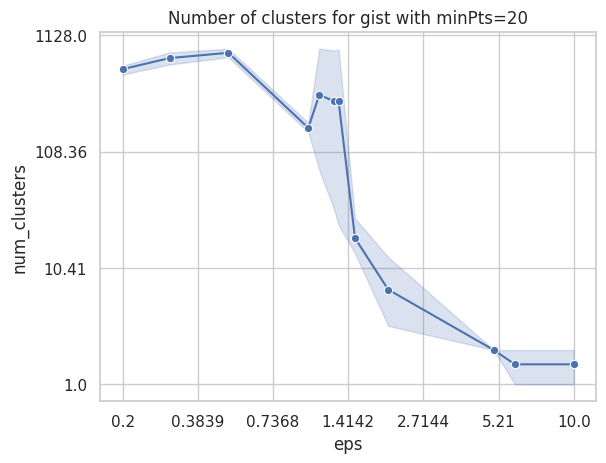

In [4]:
minPts = 20

# sns.set(style="darkgrid")
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]

y_log_min = np.log10(min(df['num_clusters']))
y_log_max = np.log10(max(df['num_clusters']))
yticks = np.logspace(y_log_min, y_log_max, num = 4)
yticks = [round(x, 2) for x in yticks]

ax = sns.lineplot(data=df, x='eps', y='num_clusters', marker='o')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.minorticks_on()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.title(f"Number of clusters for {dataset} with minPts={minPts}")


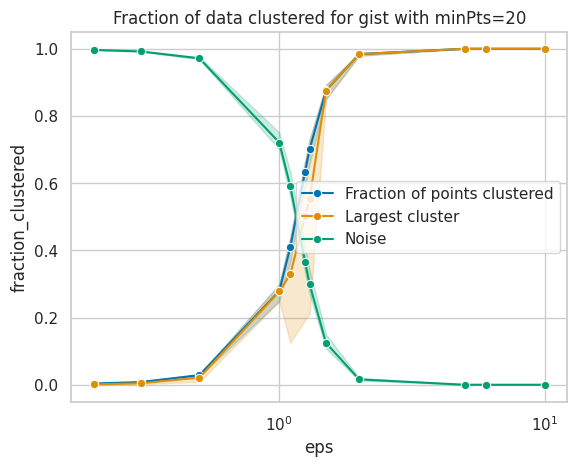

In [5]:
ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', marker='o', label="Fraction of points clustered", color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='largest_cluster_size', marker='o', label="Largest cluster", color=palette[1])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', marker='o', label="Noise", color=palette[2])
#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
plt.title(f"Fraction of data clustered for {dataset} with minPts={minPts}")
plt.legend()

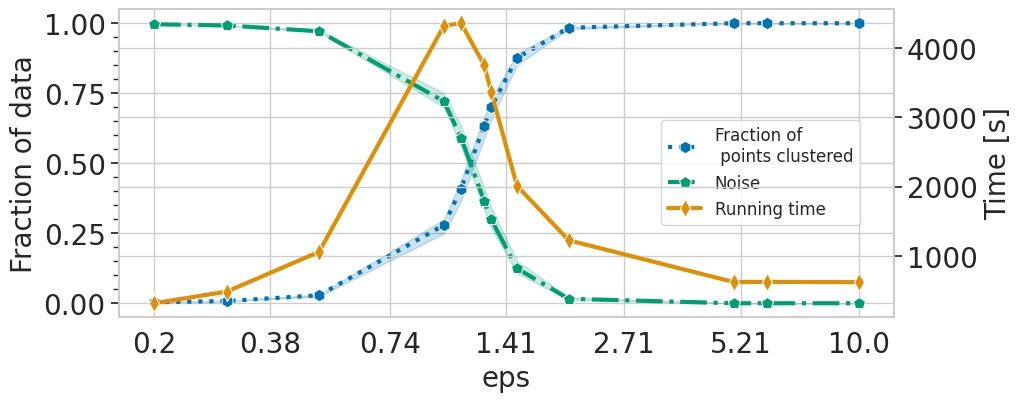

In [8]:
fontsize = 20
ms = 9
thickness = 3
x_log_min = np.log10(min(df2['eps']))
x_log_max = np.log10(max(df2['eps']))

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', 
            marker='h', 
            ms=ms,
            label="Fraction of \n points clustered",
            linestyle=":",
            linewidth=thickness, 
            color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', 
             marker='p', 
             label="Noise", 
             ms=ms,
             linestyle="-.",
             linewidth=thickness,
             color=palette[2])
ax2 = plt.twinx()
sns.lineplot(ax=ax2, data=df2, x='eps', y='time', 
             marker='d', 
             ms=ms,
             label="Running time", 
             linewidth=thickness,
             color=palette[1])
#ax.set_yscale('log')
#ax.set_xlim(1000) # for mnist
ax.set_xscale('log')
ax.set_ylabel('Fraction of data' , fontsize=fontsize)
#ax.get_yaxis().set_visible(False)
ax2.set_ylabel('Time [s]' , fontsize=fontsize)
ax.set_xlabel('eps', fontsize=fontsize)
ax.minorticks_on()

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
handles += handles2
labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 2) for x in xticks] # 4 for aloi, -2 for mnist, plus added int()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=fontsize)
ax.yaxis.set_tick_params(labelsize = fontsize)
ax2.yaxis.set_tick_params(labelsize = fontsize)

# Create a single legend
ax2.get_legend().remove()
ax.legend(handles, labels, fontsize=12, loc=(0.7, 0.30))

# Cluster Quality

In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

dataset = 'gist'

exact_algorithm = 'faiss'

In [10]:
data = []

exact_data = {}
for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        exact_data[f.attrs['eps']] = (np.array(f['labels']), np.array(f['corepoints']), np.array(f['borderpoints']))
    else:
        data.append({
            "clustering": np.array(f['labels']),
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
            "params": f.attrs.get("params", "")
        })


metrics = []

for eps, (gt_labels, corepoints, borderpoints) in exact_data.items():
    filtered_data = [d for d in data if d['eps'] == eps]
    # remove border points
    gt_labels[borderpoints] = -1
    for d in filtered_data:
        labels = d["clustering"]
        labels[borderpoints] = -1
        metrics.append({
            "eps": eps,
            "time": d['time'],
            "algo": d["algo"],
            "ARI": adjusted_rand_score(gt_labels, labels),
            "NMI": normalized_mutual_info_score(gt_labels, labels),
            "params": d.get("params", "")
        })

if dataset == 'gist':
    quality_df = pd.DataFrame(data)
    quality_df.sort_values(by=["eps"])

# Running time plot

In [19]:
if dataset == 'gist':
    data = pd.DataFrame(data)
    times = []
    for i in range(len(data['params'])):
        if data['algo'][i] == 'srrdbscan': 
            if data['params'][i][16:35].split(",")[0] == '0.1':
                times.append({
                            "time": data['time'][i],
                            "algo": 'srrdbscan',
                            "eps": data['eps'][i],
                        })
        else:
            times.append({
                        "time": data['time'][i],
                        "algo": data['algo'][i],
                        "eps": data['eps'][i],
                    })

    times = pd.DataFrame(times)

[Text(0, 317.27, '317.27'),
 Text(0, 840.5, '840.5'),
 Text(0, 2226.62, '2226.62'),
 Text(0, 5898.72, '5898.72'),
 Text(0, 15626.77, '15626.77')]

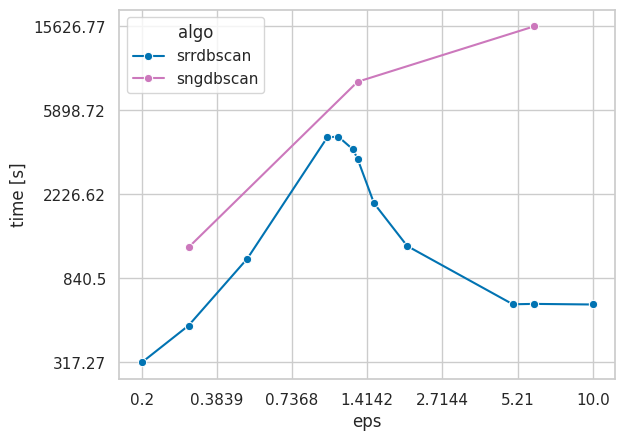

In [21]:
custom_palette = {"srrdbscan": palette[0], 
                  "tpedbscan": palette[1], 
                  "faiss": palette[2], 
                  "sklearn": palette[3], 
                  "sngdbscan": palette[4],
                  "IP.LSH.DBSCAN": palette[4]}

ax = sns.lineplot(data=times, x='eps', y='time', hue="algo", marker='o', palette=custom_palette)
ax.set_ylabel('time [s]')
ax.set_xscale("log")
ax.set_yscale("log")

# Set gridlines and ticks
x_log_min = np.log10(min(times['eps']))
x_log_max = np.log10(max(times['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(times['time']))
y_log_max = np.log10(max(times['time']))
yticks = np.logspace(y_log_min, y_log_max, num = 5)
yticks = [round(x, 2) for x in yticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

In [22]:
Algo = ['srrdbscan', 'sngdbscan', 'tpedbscan', 'faiss', 'sklearn', 'IP.LSH.DBSCAN']
eps = [0.3, 1.0, 1.3, 2.0, 6.0] # gist

M = [[0 for _ in range(len(eps))] for _ in range(len(Algo))]
x=0
y=0

for i in range(len(times)):
    if times["eps"][i] in eps:
        x = Algo.index(times["algo"][i])
        y = eps.index(times["eps"][i])
        M[x][y] = str(round(times["time"][i], 2))

for i in range(len(Algo)):
    for j in range(len(eps)):
        if M[i][j] == 0.0:
            M[i][j] = 'Missing'

for j in range(len(eps)):
    print(str("&"), eps[j], str("&"), 
          M[0][j], str("&"), 
          M[1][j], str("&"), 
          M[2][j], str("&"), 
          M[3][j], str("&"), 
          M[4][j], str(r"\\"))

& 0.3 & 486.59 & 1205.0 & Missing & Missing & Missing \\
& 1.0 & 4319.16 & Missing & Missing & Missing & Missing \\
& 1.3 & 3366.59 & 8224.89 & Missing & Missing & Missing \\
& 2.0 & 1224.69 & Missing & Missing & Missing & Missing \\
& 6.0 & 625.71 & 15626.77 & Missing & Missing & Missing \\


In [23]:
for i in range(len(eps)): 
    print(eps[i])

0.3
1.0
1.3
2.0
6.0


## Collective running time plot

In [24]:
sets = {"aloi": [27, 0.0005, 0.2], 
    "celeba": [39, 0.4, 8.0], 
    "census": [500, 0.01, 10.0], 
    "gist": [960, 0.2, 10.0], 
    "glove": [100, 1, 20.0], 
    "household": [7, 0.01, 1000.0], 
    "mnist": [784, 500.0, 10000], 
    "pamap2": [4, 0.1, 500.0]}


data = []

for dataset in sets:
    for f in load_all_results(dataset, ".."):
        if dataset == "aloi" or dataset == "mnist" or dataset == "pamap2":
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1' and "1.0" in f.attrs['params'] :
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })
        else:
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1':
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })


df = pd.DataFrame(data=data)
df

,data,eps,time
0,aloi,0.248120,1.840308e-06
1,aloi,0.001504,4.312027e-07
2,aloi,0.007519,3.742121e-07
3,aloi,0.147870,2.600471e-06
4,aloi,0.097744,1.899839e-06
...,...,...,...
107,pamap2,0.019804,4.422527e-06
108,pamap2,1.000000,2.720755e-06
109,pamap2,1.000000,2.529102e-06
110,pamap2,0.002801,3.826029e-06


In [25]:
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))

df['eps']

/tmp/ipykernel_283530/665235534.py:1: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))


0      0.248120
1      0.001504
2      0.007519
3      0.147870
4      0.097744
         ...   
107    0.019804
108    1.000000
109    1.000000
110    0.002801
111    0.002801
Name: eps, Length: 112, dtype: float64

/tmp/ipykernel_283530/1709101797.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
/tmp/ipykernel_283530/1709101797.py:13: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


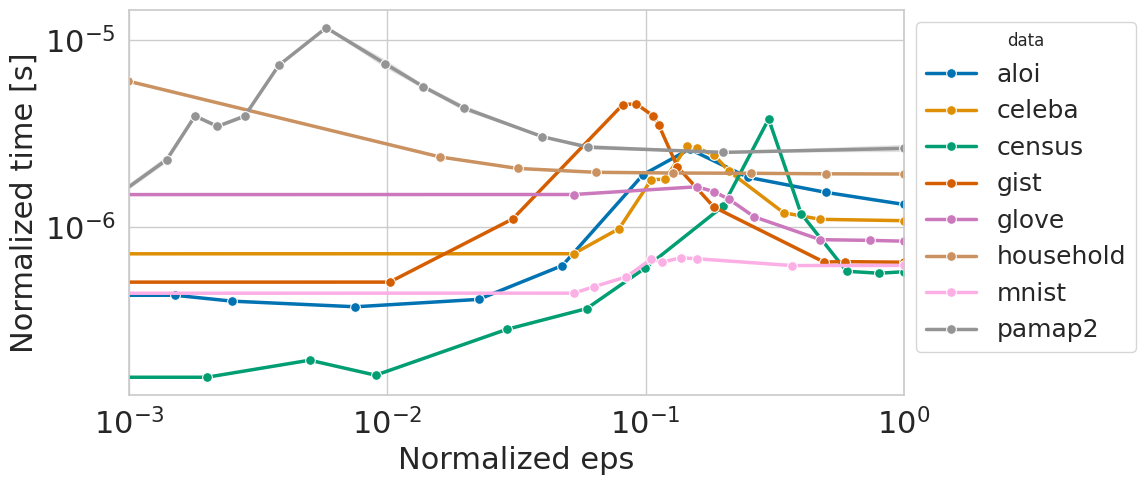

In [26]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
ax.set_xlim(0.001, 1)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Normalized eps", fontsize = 22)
ax.set_ylabel("Normalized time [s]", fontsize = 22)

x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(df['time']))
y_log_max = np.log10(max(df['time']))
#yticks = np.logspace(y_log_min, y_log_max, num = 5)
#yticks = [round(x, 2) for x in yticks]
# ax.set_xticks(xticks)
#ax.set_xticklabels(xticks)
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticks)

ax.xaxis.set_tick_params(labelsize = 22)
ax.yaxis.set_tick_params(labelsize = 22)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 18)